In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input

# Load the CSV file into a DataFrame
df = pd.read_csv('../generated_csv_files/top_100_senders_output.csv')

# Rename the 'from' column to avoid using a reserved keyword
df.rename(columns={'from': 'from_', 'body': 'body_'}, inplace=True)

# Get the top 100 senders by email count
top_senders = df['from_'].value_counts().head(100).index

# Filter the data to include only emails from these top 100 senders
filtered_data = df[df['from_'].isin(top_senders)]

# Split the data into training, validation, and test sets (70%, 15%, 15%)
train_data, temp_data = train_test_split(filtered_data, test_size=0.3, stratify=filtered_data['from_'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['from_'], random_state=42)

# Prepare the feature and target variables
X_train = train_data['body_']
y_train = train_data['from_']
X_val = val_data['body_']
y_val = val_data['from_']
X_test = test_data['body_']
y_test = test_data['from_']

# Tokenize the email content
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_seq_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_cat = to_categorical(y_train_enc)
y_val_cat = to_categorical(y_val_enc)
y_test_cat = to_categorical(y_test_enc)

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(max_seq_length,)))  # Explicitly setting input shape
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=100, activation='softmax'))  # Adjusted to match the number of classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_cat, validation_data=(X_val_pad, y_val_cat), epochs=10, batch_size=64)

# Evaluate the model on the validation and test sets
val_loss, val_accuracy = model.evaluate(X_val_pad, y_val_cat)
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_cat)

# Output validation and test set accuracy
val_accuracy, test_accuracy

ImportError: cannot import name 'message' from 'google.protobuf' (unknown location)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 65s 811ms/step - accuracy: 0.8924 - loss: 0.4037 - val_accuracy: 0.6706 - val_loss: 1.2962
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 781ms/step - accuracy: 0.9148 - loss: 0.3380 - val_accuracy: 0.6780 - val_loss: 1.3020
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 808ms/step - accuracy: 0.9257 - loss: 0.2907 - val_accuracy: 0.6716 - val_loss: 1.3706
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 378ms/step - accuracy: 0.9283 - loss: 0.2739 - val_accuracy: 0.6780 - val_loss: 1.3676
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - accuracy: 0.9386 - loss: 0.2417 - val_accuracy: 0.6853 - val_loss: 1.3962
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - accuracy: 0.9536 - loss: 0.1962 - val_accuracy: 0.6780 - val_loss: 1.4473
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9577 - loss: 0.1795 - val_accuracy: 0.6872 - val_loss: 1.4851
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9616 - loss: 0.1592 - val_accu

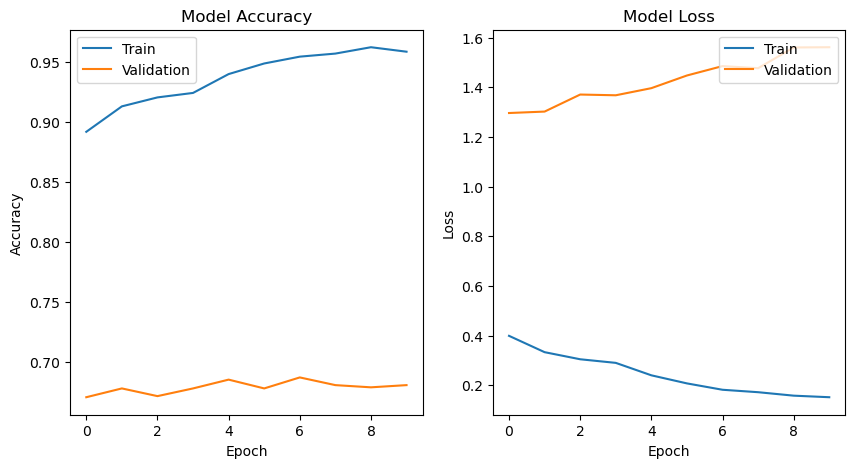

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step
Validation F1 Score: 0.6823952808752828
Validation Confusion Matrix:
 [[29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 26  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  3 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  3  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 16  0  1  4  1  0  2  0  2  1  2  1  7  0  1  0  0  0  1  0
   3  0  0  0  1  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0
   1  0  0  0  0  0]
 [ 0  0  0  0  1  0 24  0  0  0  0  0  0  0  1  0  2  0  0  1  0  0  0  0
   0  0  0  0  1  1]
 [ 0  1  0  0  3  0  0 56  0  0  1  0  1  2  1  0  6  2  1  0  0  0  2  0
   4  0  1  0  1  3]
 [ 0  0  0  0  1  0  0  1 25  0  0  0  0  2  1  0  0  1  0  1  1  0  0  0
   1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 42  0 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Assuming you have the model's history after training
history = model.fit(X_train_pad, y_train_cat, validation_data=(X_val_pad, y_val_cat), epochs=10, batch_size=64)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Predict the labels on the validation set
y_val_pred = model.predict(X_val_pad)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Calculate the F1 score
val_f1 = f1_score(y_val_enc, y_val_pred_classes, average='weighted')

# Generating the confusion matrix
val_confusion_matrix = confusion_matrix(y_val_enc, y_val_pred_classes)

# Output the F1 score and confusion matrix
print("Validation F1 Score:", val_f1)
print("Validation Confusion Matrix:\n", val_confusion_matrix)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


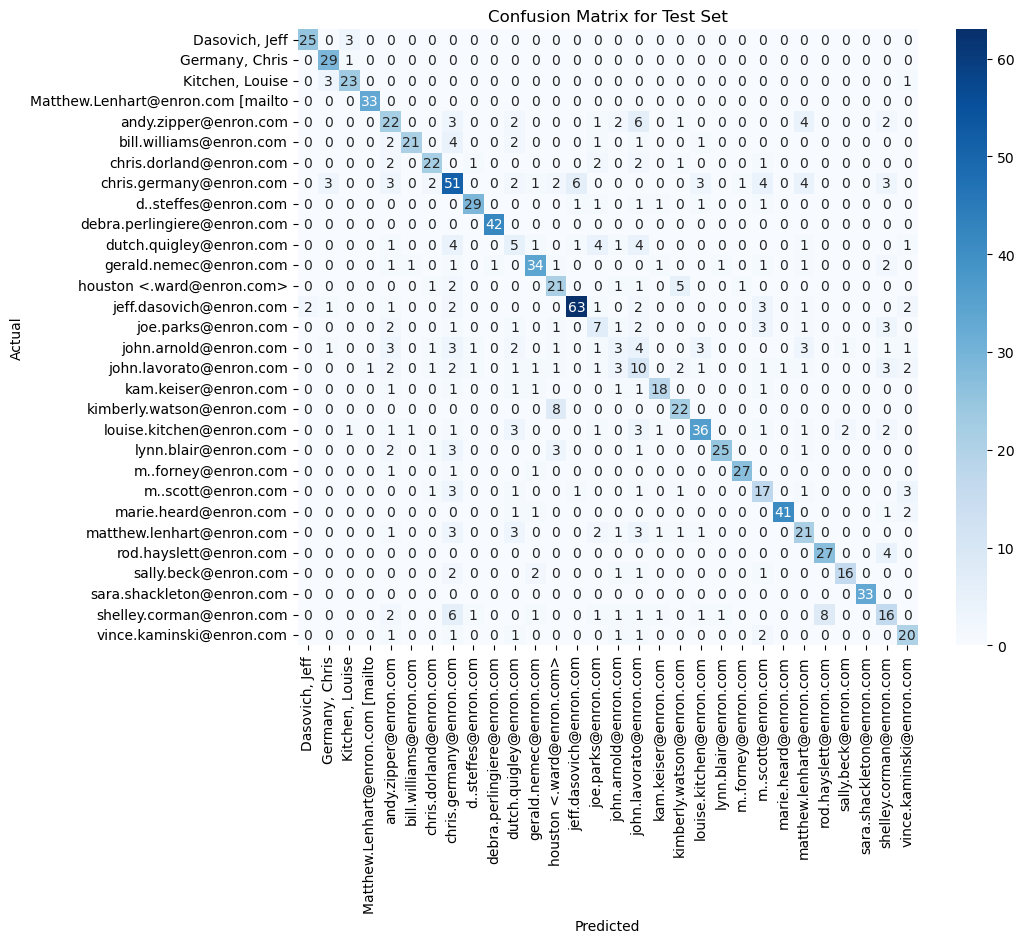

Test F1 Score: 0.6977745580440912


In [5]:
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Predict the labels on the test set
y_test_pred = model.predict(X_test_pad)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate the F1 score for the test set
test_f1 = f1_score(y_test_enc, y_test_pred_classes, average='weighted')

# Generating the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test_enc, y_test_pred_classes)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Output the F1 score
print("Test F1 Score:", test_f1)